#### [ML with Python] 3. 비지도 학습 알고리즘 (2-3) (T-SNE) Manifold Learning
- 본 포스팅은 Manifold Learning에 관한 기본적인 내용에 관하여 다룹니다.
- 확률적 임베딩(`SNE`) 
- t-분포 확률적 임베딩(`t-SNE`)

___

필요 라이브러리 import

In [7]:
import mglearn
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.decomposition import NMF
from sklearn.manifold import TSNE
from sklearn.datasets import load_digits
plt.rc('font', family='Malgun Gothic')

---

#### <u>Manifold Learning</u>

- 주로 고차원 공간에 내제한 저차원 공간을 `Manifold`라한다.
- 복잡한 매핑을 만들어 PCA보다 더 나은 시각화 제공
- 해당 알고리즘의 목적은 대부분이 시각화라 3개 이상의 특성을 뽑는 경우가 드물다.
- 훈련 데이터를 새로운 표현으로 변환시키지만 새로운 데이터에는 적용하지 못한다.
    - 따라서, 테스트 세트에는 이용하지 못하고, 단지 훈련했던 데이터 변환만 가능하다.
- `Manifold hypothesis`
    - 고차원 데이터가 있을 때, 고차원 데이터를 데이터 공간에 잘 뿌리면 <u>sample들을 잘 아우르는 subspace가 있을 것</u>이라는 가정
    - 고차원 데이터의 밀도는 낮지만, 이들의 집합을 포함하는 저차원의 Manifold가 있을 것이라는 가정
        - 저차원 Manifold를 벗어나는 순간 밀도는 급격히 감소
        - 데이터의 차원 ⇧ ∝ 데이터의 공간 크기 ⇧⇧⇧ ∝ 동일 데이터의 밀도 ⇩⇩⇩⇩
        - 즉 차원이 증가할수록 데이터 분포 분석/모델추정에 필요한 샘플데이터의 개수⇧⇧
    
    
![PNG 이미지 2020-12-14 13_34_32](https://user-images.githubusercontent.com/53929665/102087977-9eadc100-3e5d-11eb-9e03-e0e9cbf7b770.png)

<br>

---

#### <u>SNE (Stochastic Neighbor Embedding)</u>

`Manifold`를 시작하기에 앞서 `t-분포 확률적 임베딩(t-SNE)`의 개념에 관하여 간단히 살펴볼 필요가 있었다. 일단 `t-분포 확률적 임베딩(t-SNE)`를 이해하기 위해서는 `확률적 임베딩(SNE)`부터 시작해야한다. `SNE`는 <u>고차원상에서의 데이터의 점 사이의 유클리드 거리를 유사성으로 나타내는 조건부 확률로 변환하는 것으로부터 시작</u>한다. `확률적 임베딩(SNE)`는 크게 다음과 같은 단계로 나뉘어진다. 다음의 과정들을 살펴보자.

<br>

<b>STEP 1</b><br>
고차원 공간 상에서 유사한 대상들은 이웃으로 선택될 확률이 높으며, 그렇지 않은 대상들은 이웃으로 선택될 확률이 낮아지도록 하는 유사도 확률 분포를 생성한다. 수식으로 표현하면 아래와 같다. 여기서 `p_j|i`는 주어진 대상 x_i가 있을 때 x_i의 이웃으로 x_j가 선택될 조건부 확률을 의미한다. <u>여기서 x_i가 이웃으로 선택될 확률의 분포는 다음과 같은 정규분포를 따른다고 가정</u>하게된다.

- `p_j|i` ⇧ ∝ 데이터 포인트가 가깝다.
- `p_j|i` ⇩ ∝ 데이터 포인트가 멀다.

![PNG 이미지 2020-12-14 13_34_52](https://user-images.githubusercontent.com/53929665/102087983-a0778480-3e5d-11eb-917d-ddcfeaeb21cd.png)

<br>

<b>STEP 2</b><br>
고차원 공간상에서의 대상들 간의 유사도 확률 분포의 차이를 최소화하기 위해서 저차원 공간상에서의 대상들 간에도 유사도 확률 분포를 정의한다. 수식으로 표현하면 다음과 같다. 여기서 y_i와 y_j는 각각 고차원 공간상의 대상 x_i, x_j에 대응하는 저차원 공간상에서의 대상을 의미한다. (여기서 조건부 확률의 계산에 사용되는 가우시안의 경우 분산 1/root(2)로 설정하게된다.)
![PNG 이미지 2020-12-14 13_35_10](https://user-images.githubusercontent.com/53929665/102087987-a1101b00-3e5d-11eb-98a4-b4ab01f137e8.png)

<br>

<b>STEP 3</b><br>
STEP1과 STEP2 이후에 저차원 공간상에서 확률분포가 고차원 공간상에서 확률분포를 잘 대변하는지 확인하기 위해 `Kullback-Leibler Divergence`라는 지표를 사용한다. 만약 두 공간상에서의 분포가 비슷할수록 해당 지표는 0에 가까운 값을 가지게 된다. 마지막으로 해당 지표로 부터 도출되는 `비용함수(C)`를 최소화(`즉, 조건부 확률 p_j|i와 q_j|i가 근사하는 것을 목표로함`)하는 `q_j|i`를 기울기하강법으로 찾게되면 `SNE`과정이 마무리된다.
![PNG 이미지 2020-12-14 13_35_31](https://user-images.githubusercontent.com/53929665/102087991-a1101b00-3e5d-11eb-96ca-30e01b9338d1.png)

<br>

---

#### <u>t-SNE (t-distributed stochastic neighbor embedding)</u>

`t-SNE`는 `SNE`의 간단한 변형에 해당하며 `SNE`와의 차이점은 다음과 같다.

<b>`SNE`와의 차이점 1</b><br>
대칭점 간의 유사도를 대칭적으로 형성하기 위해서 다음과 같은 `대칭 형태의 확률 분포`를 사용한다.
![PNG 이미지 2020-12-14 13_35_49](https://user-images.githubusercontent.com/53929665/102087994-a1a8b180-3e5d-11eb-8763-112c1156dc9a.png)

<br>

<b>`SNE`와의 차이점 2</b><br>

위에서 고차원의 확률분포는 대칭 형태의 확률분포 `p_ij`를 사용하였다. 마찬가지로, 저차원 공간상에서의 확률분포 또한 `q_ij`라 지칭하며, `Kullback-Leibler Divergence`에서 `q_j|i`와 동일시 사용된다.
![PNG 이미지 2020-12-14 13_35_59](https://user-images.githubusercontent.com/53929665/102087995-a2414800-3e5d-11eb-9263-572fc16b8ca7.png)

<br>

<b>`SNE`와의 차이점 3</b><br>
<u>고차원에서 저차원 점으로 투영하게 될 경우, 거리의 멀고 가까움이 파괴될 가능성이 다분</u>하며 이를 `Crowding Problem`이라한다. 따라서 이를 방지하기 위해서는 <u>고차원에서 멀리 떨어진 점은 저차원에서는 더 멀게, 고차원에서 가까웠던 점은 저차원에서 더 가깝게 만들 필요</u>가 있다.

<br>

이를 해결하기위해서 정규분포를 가정하던 기존의 방법과 달리 `Student-t`분포를 사용하여 결합 확률 `q_ij`를 다음과 같이 정의한다.

![PNG 이미지 2020-12-14 13_36_09](https://user-images.githubusercontent.com/53929665/102087998-a2d9de80-3e5d-11eb-88bd-52f79a01fc06.png)

<br>

위와 같이 정의하게 될 경우, 기존의 꼬리가 얇고 길었던 정규분포의 그래프 형태에서 꼬리가 두꺼워진 `student-t`그래프의 형태로 변환하게 된다. 아래의 자료를 통해서 동일 자료에서 `정규분포`와 `student-t`그래프의 차이점에 관하여 직관적으로 파악할 수 있다. 

<br>

두 그래프를 비교하였을 때, 그래프가 겹치는 지점 사이 범위에서는 `student-t`의 q값(그림에서는 P(X))이 `정규분포`보다 저평가되고 있음을 확인 가능하다. 따라서, 동일 q값을 기준으로 가까운점의 값이 더 가까워 짐을 시각적으로 파악할 수 있다. 또한, 겹치는 지점의 외부 범위에서는 `studnet-t`의 q값이 `정규분포`보다 고평가되고 있음을 확인 가능하다. 따라서, 동일 q값을 기준으로 먼 점의 값이 더 멀어짐을 파악할 수 있다.

![PNG 이미지 2020-12-14 14_21_15](https://user-images.githubusercontent.com/53929665/102092160-17634c00-3e63-11eb-86b3-0a8cc6533c7f.png)

<br>

---

#### <u>t-SNE를 이용한 매니폴드 학습</u>

`scikit-learn`에 있는 손글씨 숫자 데이터셋에 `t-SNE 매니폴드`학습을 적용해보자.

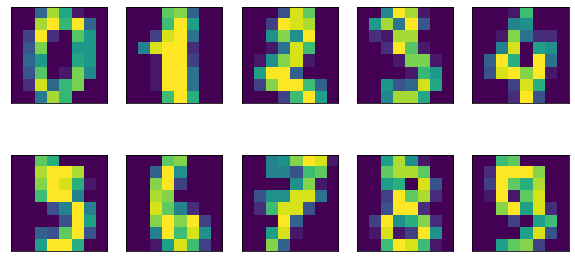

In [2]:
from sklearn.datasets import load_digits
digits = load_digits()

fig, axes = plt.subplots(2, 5, figsize=(10, 5),
                         subplot_kw={'xticks':(), 'yticks': ()})
for ax, img in zip(axes.ravel(), digits.images):
    ax.imshow(img)

<br>

비교를 위해서, 먼저 `PCA`를 이용해서 데이터를 2차원으로 축소화할 것이다.

Text(0, 0.5, '두 번째 주성분')

C:\Users\jhryu\AppData\Local\Programs\Python\Python37\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\jhryu\AppData\Local\Programs\Python\Python37\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


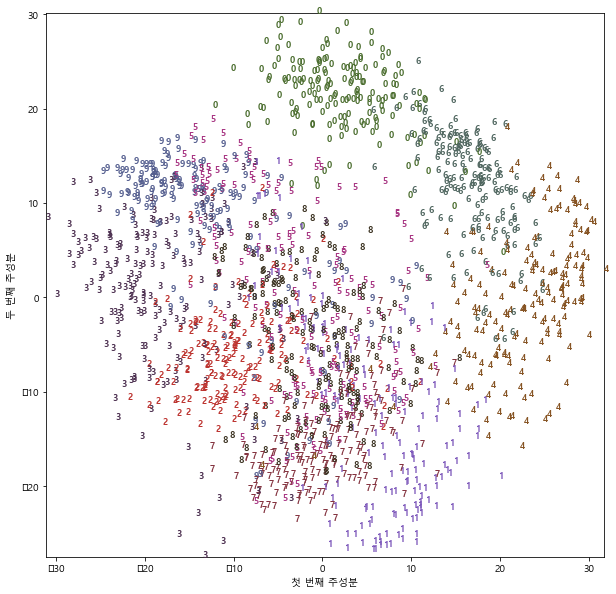

In [4]:
# PCA 모델을 생성합니다
pca = PCA(n_components=2)
pca.fit(digits.data)
# 처음 두 개의 주성분으로 숫자 데이터를 변환합니다
digits_pca = pca.transform(digits.data)
colors = ["#476A2A", "#7851B8", "#BD3430", "#4A2D4E", "#875525",
          "#A83683", "#4E655E", "#853541", "#3A3120","#535D8E"]
plt.figure(figsize=(10, 10))
plt.xlim(digits_pca[:, 0].min(), digits_pca[:, 0].max())
plt.ylim(digits_pca[:, 1].min(), digits_pca[:, 1].max())
for i in range(len(digits.data)):
    # 숫자 텍스트를 이용해 산점도를 그립니다
    plt.text(digits_pca[i, 0], digits_pca[i, 1], str(digits.target[i]),
             color = colors[digits.target[i]],
             fontdict={'weight': 'bold', 'size': 9})
plt.xlabel("첫 번째 주성분")
plt.ylabel("두 번째 주성분")

각 클래스가 어디에 있는지 살펴보기 위해 실제 숫자를 이용해 산점도를 그렸다. 0, 6, 4의 경우 비교적 잘 분리된 것 같지만, 중첩된 부분이 많이 관측된다.

<br>

이제, `t-SNE`를 적용해 위의 결과와 비교해볼 것이다. 여기서 `t-SNE`는 새 데이터를 변환하는 기능을 제공하지 않기에` transform` 매소드가 없다. 대신 `fit_transform`이 있다. (솔직히 이럴 것이면 왜 하나만 없는지 개인적으로 너무 궁금하다.)

Text(0, 0.5, 't-SNE 특성 1')

C:\Users\jhryu\AppData\Local\Programs\Python\Python37\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\jhryu\AppData\Local\Programs\Python\Python37\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


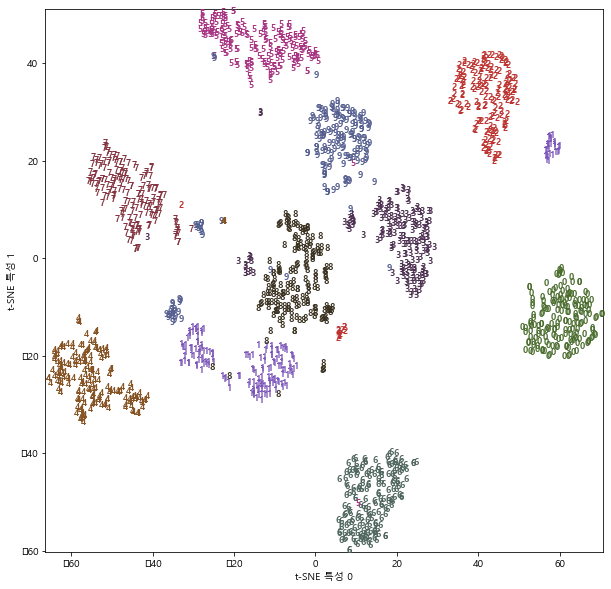

In [6]:
from sklearn.manifold import TSNE
tsne = TSNE(random_state=42)
# TSNE에는 transform 메소드가 없으므로 대신 fit_transform을 사용합니다
digits_tsne = tsne.fit_transform(digits.data)

plt.figure(figsize=(10, 10))
plt.xlim(digits_tsne[:, 0].min(), digits_tsne[:, 0].max() + 1)
plt.ylim(digits_tsne[:, 1].min(), digits_tsne[:, 1].max() + 1)
for i in range(len(digits.data)):
    # 숫자 텍스트를 이용해 산점도를 그립니다
    plt.text(digits_tsne[i, 0], digits_tsne[i, 1], str(digits.target[i]),
             color = colors[digits.target[i]],
             fontdict={'weight': 'bold', 'size': 9})
plt.xlabel("t-SNE 특성 0")
plt.ylabel("t-SNE 특성 1")

`t-SNE`는 `PCA`와 비교될 정도로 모든 클래스가 확실히 잘 구분된 것을 확인할 수 있다(1과 9의 경우 좀 나뉘었지만 그룹으로 모여있기에 PCA와 확실히 비교된다).

---

### References

- 안드레아스 뮐러, 세라 가이도, 『파이썬 라이브러리를 활용한 머신러닝』, 박해선, 한빛미디어(2017)
- https://terms.naver.com/entry.nhn?docId=5733143&cid=60266&categoryId=60266
- https://dos-tacos.github.io/paper%20review/TSNE/